In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from sktime.utils.plotting import plot_correlations
from statsmodels.api import tsa
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error



plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,5)

### AR(p)-процесс

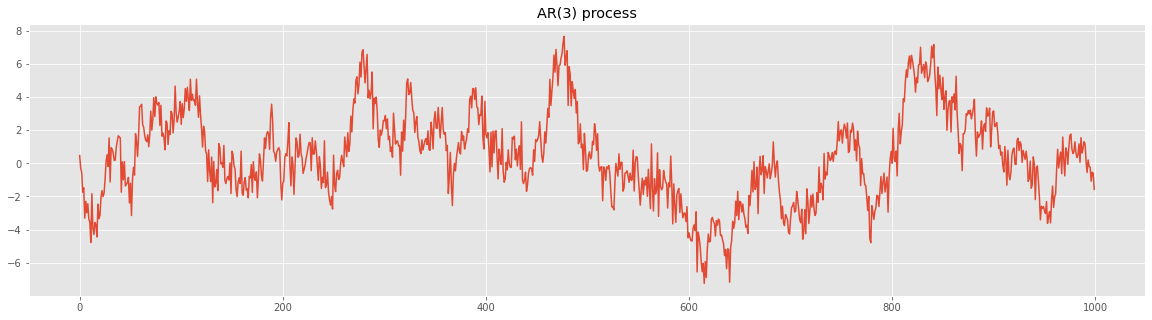

In [12]:
ma_process = tsa.ArmaProcess(ar=[1, -0.5, -0.25, -0.2])
sample = pd.Series(ma_process.generate_sample(nsample=1000, burnin = 10000))
sample.plot()
plt.title('AR(3) process');

In [13]:
sample

0      0.471634
1     -0.283943
2     -0.560960
3     -1.740508
4     -1.482460
         ...   
995   -0.228448
996   -1.077340
997   -0.533800
998   -0.599529
999   -1.569671
Length: 1000, dtype: float64

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot: >,
        <AxesSubplot: title={'center': 'Autocorrelation'}>,
        <AxesSubplot: title={'center': 'Partial Autocorrelation'}>],
       dtype=object))

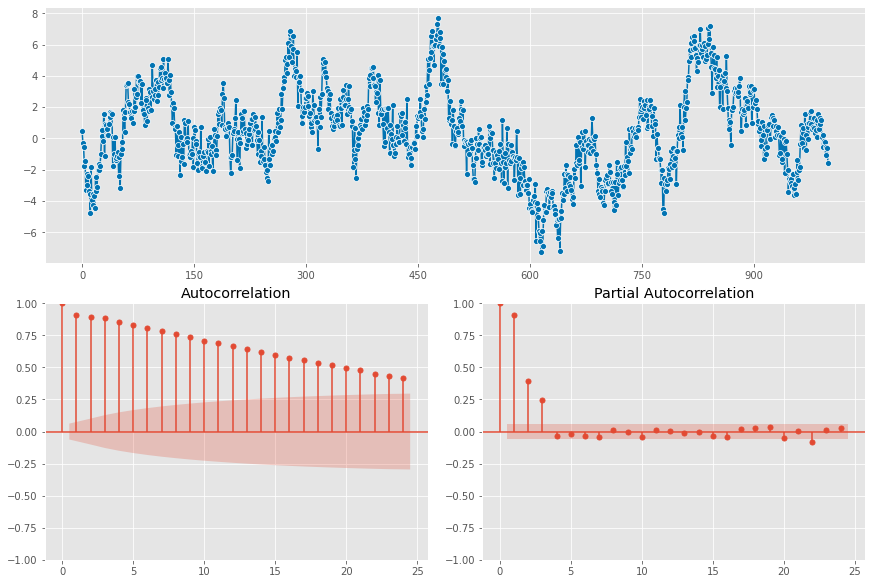

In [14]:
plot_correlations(sample)

In [20]:
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.model_selection import temporal_train_test_split

test_size = 200
train, test = temporal_train_test_split(sample, test_size = test_size)

<AxesSubplot: >

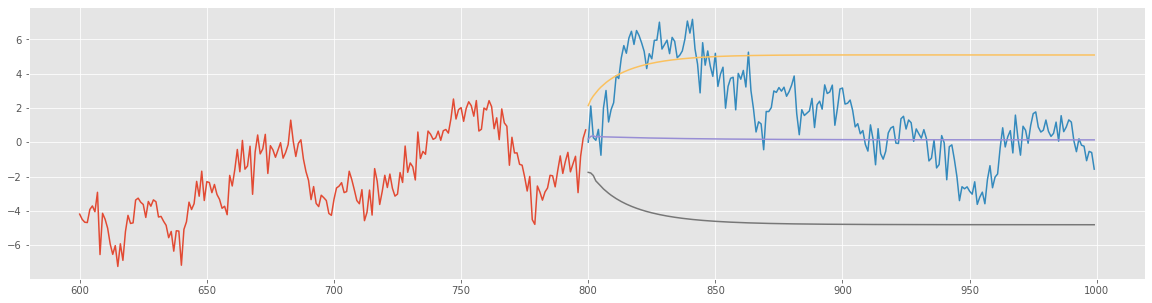

In [21]:
forecaster = ARIMA(order = (3,0,0))

forecaster.fit(train)

forecast = forecaster.predict(list(range(1, test_size+1)))
variance = forecaster.predict_interval(list(range(1, test_size+1)), coverage = 0.95)

train.tail(test_size).plot()
test.plot()
forecast.plot()
variance['Coverage'][0.95]['lower'].plot()
variance['Coverage'][0.95]['upper'].plot()

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot: >,
        <AxesSubplot: title={'center': 'Autocorrelation'}>,
        <AxesSubplot: title={'center': 'Partial Autocorrelation'}>],
       dtype=object))

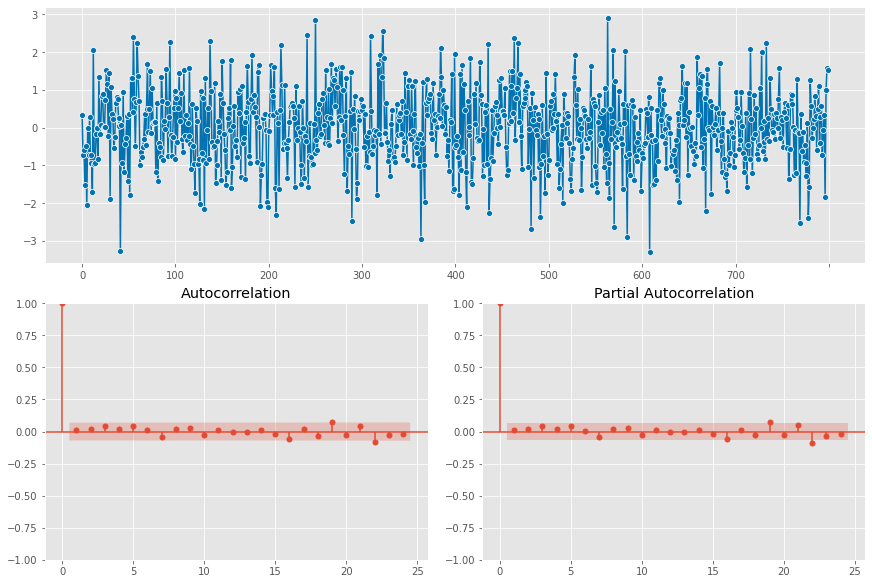

In [25]:
resid = forecaster.predict_residuals()

plot_correlations(resid)

In [23]:
forecaster.predict(list(range(1, 1000+1)))

950     1.397433
951     1.271767
952     1.160630
953     1.062385
954     0.972230
          ...   
1945    0.105959
1946    0.105959
1947    0.105959
1948    0.105959
1949    0.105959
Length: 1000, dtype: float64

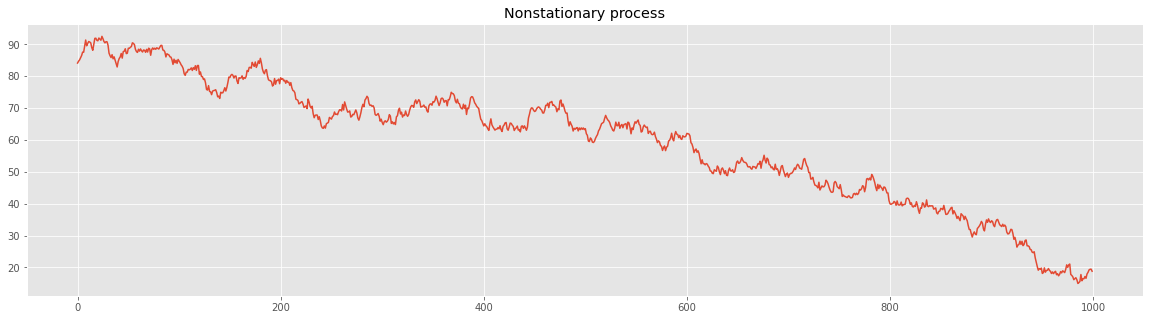

In [37]:
nonstationary_process = tsa.ArmaProcess(ar=[1, -1])
sample = pd.Series(nonstationary_process.generate_sample(nsample=1000, burnin = 10000))
sample.plot()
plt.title('Nonstationary process');


In [26]:
nonstationary_process.isstationary

False

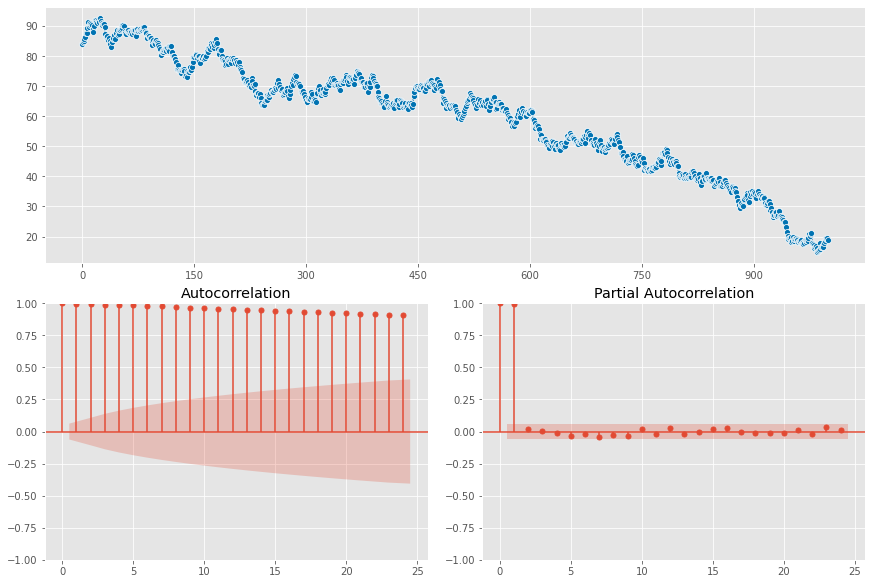

In [40]:
plot_correlations(sample);

Теперь попробуем взять реальные данные и оценить характеристики некоторого AR(p)-процесса. Возьмём какой-нибудь стационарный ряд.

In [41]:
import statsmodels.api as sm
data = sm.datasets.macrodata.load_pandas().data


<AxesSubplot: >

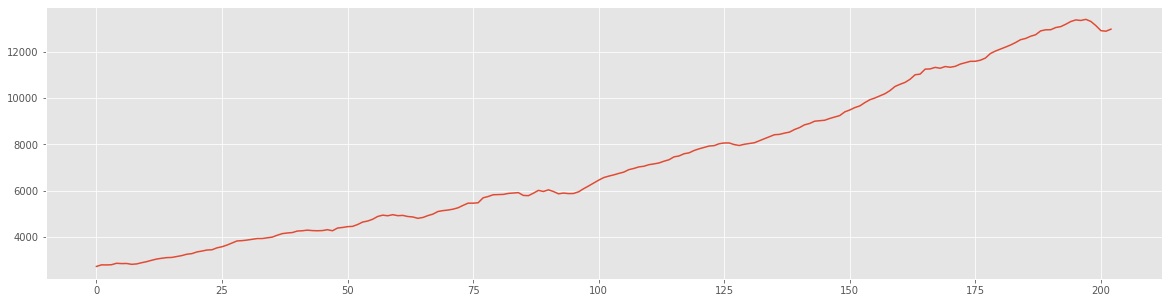

In [42]:
data.realgdp.plot()

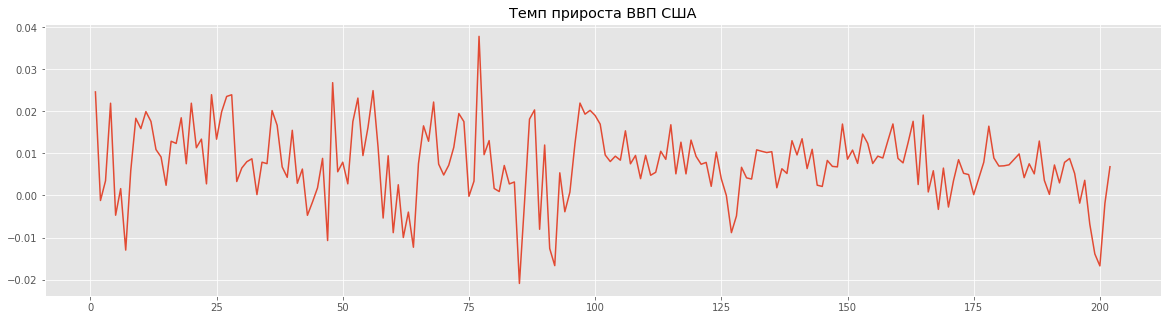

In [43]:
g_rate = (data.realgdp.diff() / data.realgdp).dropna()
g_rate.plot()
plt.title("Темп прироста ВВП США");

Посмотрим на коррелограммы

In [47]:
test_size = 20
train, test = temporal_train_test_split(g_rate, test_size = test_size)

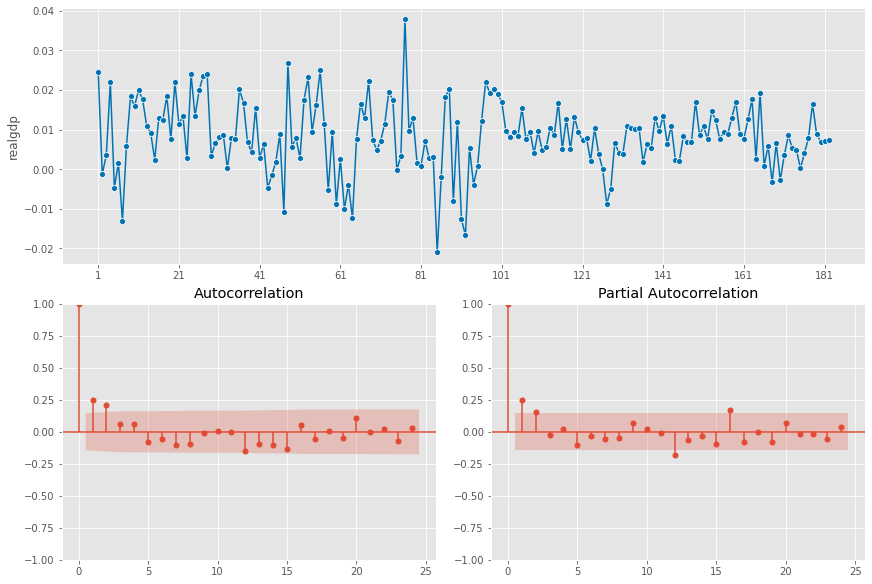

In [48]:
plot_correlations(train);

C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zehov\AppData\Local\Programs\Py

Forecast error: 2.6967329786190852


C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\s

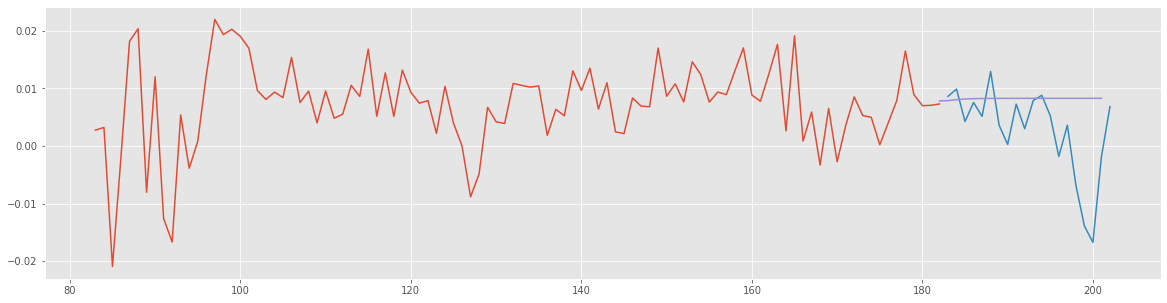

In [50]:
from sktime.forecasting.arima import AutoARIMA, ARIMA

fh = list(range(len(test)))
forecaster = AutoARIMA(max_p=2, max_q=2, stationary=True)
forecaster.fit(train)
prediction = forecaster.predict(fh=fh)

train.tail(100).plot()
test.plot()
prediction.plot()
print(f'Forecast error: {mean_absolute_percentage_error(test, prediction)}')

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot: >,
        <AxesSubplot: title={'center': 'Autocorrelation'}>,
        <AxesSubplot: title={'center': 'Partial Autocorrelation'}>],
       dtype=object))

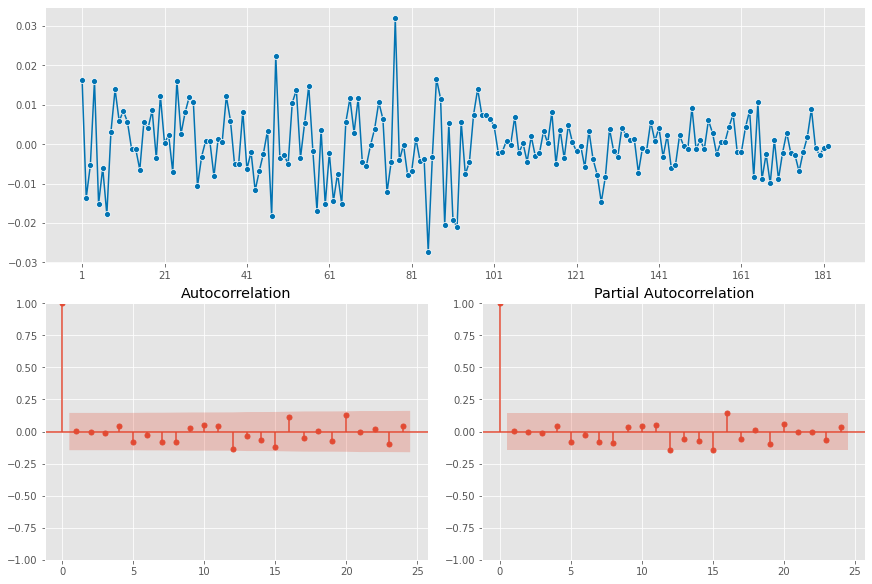

In [51]:
plot_correlations(forecaster.predict_residuals())

In [52]:
forecaster.get_fitted_params()

{'intercept': 0.005224481639597477,
 'ar.L1': 0.21230144270458998,
 'ar.L2': 0.15596748073383546,
 'sigma2': 6.862309541731218e-05,
 'order': (2, 0, 0),
 'seasonal_order': (0, 0, 0, 0),
 'aic': -1220.0398562214095,
 'aicc': -1219.8138675208445,
 'bic': -1207.2238294731023,
 'hqic': -1214.8444254563112}

In [53]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 614.020
Date:                Mon, 27 Feb 2023   AIC                          -1220.040
Time:                        20:16:46   BIC                          -1207.224
Sample:                             0   HQIC                         -1214.844
                                - 182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.001      6.547      0.000       0.004       0.007
ar.L1          0.2123      0.069      3.079      0.002       0.077       0.347
ar.L2          0.1560      0.065      2.410      0.016       0.029       0.283
sigma2      6.862e-05   5.59e-06     12.285      0.000    5.77e-05    7.96e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.86
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecast error: 2.692793135569528


C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


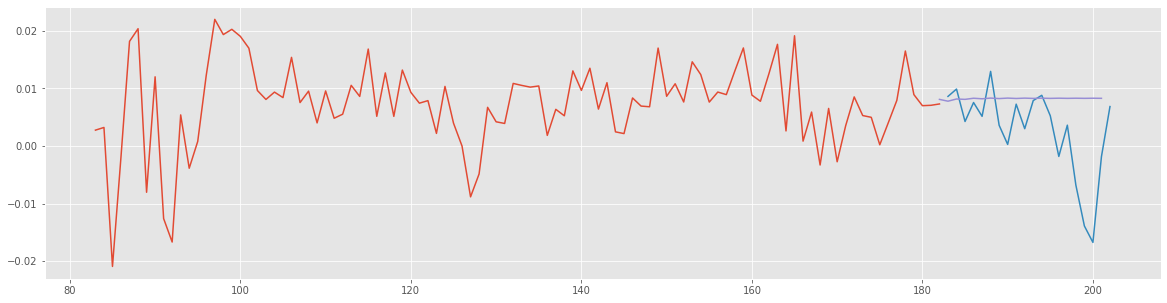

In [54]:
fh = list(range(len(test)))
forecaster = ARIMA(order=(2,0,2))
forecaster.fit(train)
prediction = forecaster.predict(fh=fh)

train.tail(100).plot()
test.plot()
prediction.plot()
print(f'Forecast error: {mean_absolute_percentage_error(test, prediction)}')